In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
target_column_name = df.columns[-1]
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 717 samples
Testing set size: 308 samples


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
y_pred = dt_classifier.predict(X_test_scaled)

In [16]:
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8442

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       159
           1       0.77      0.96      0.86       149

    accuracy                           0.84       308
   macro avg       0.86      0.85      0.84       308
weighted avg       0.86      0.84      0.84       308



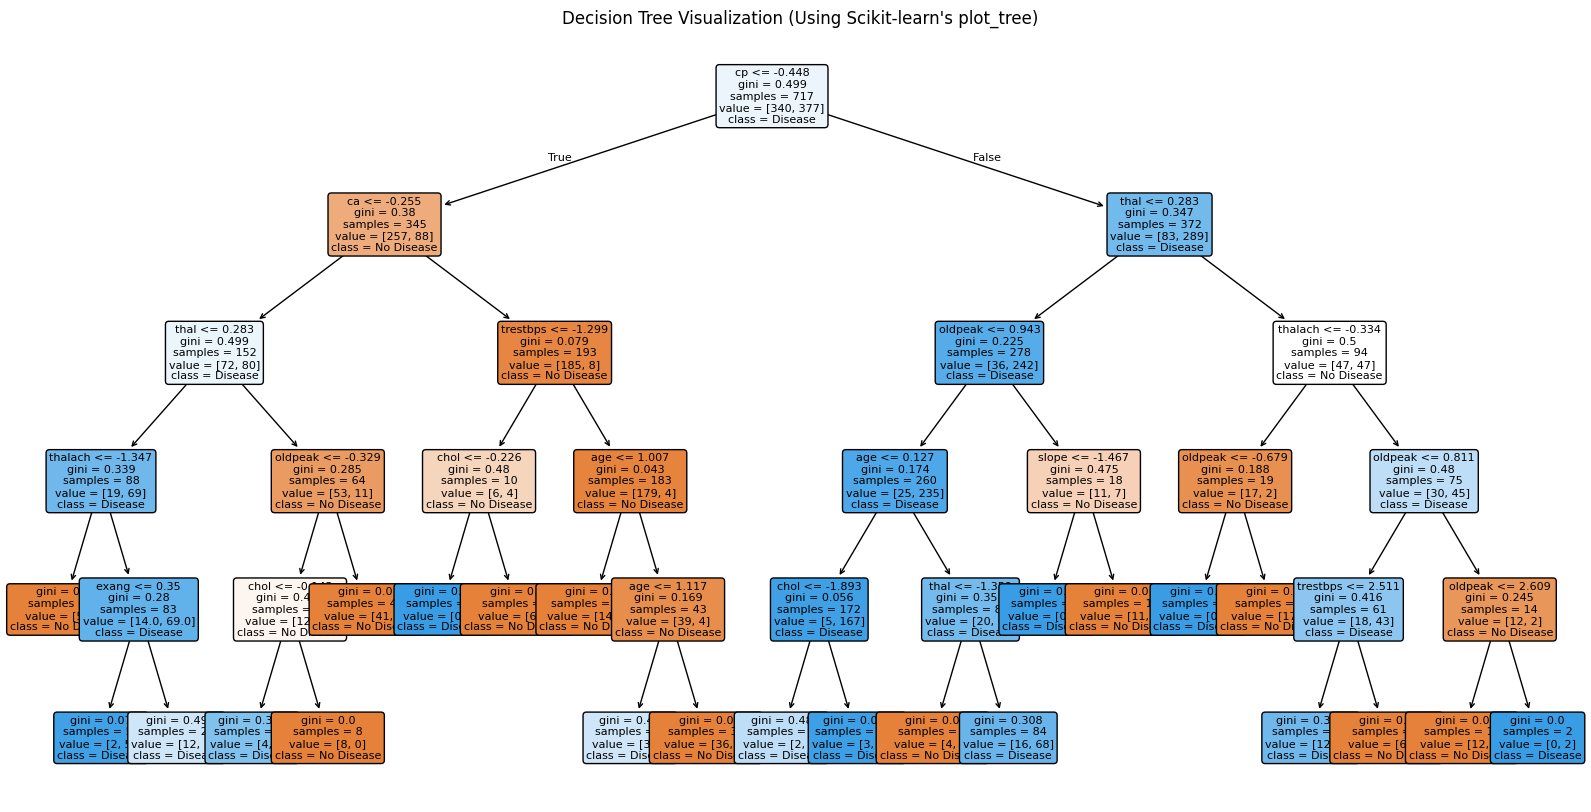

In [17]:
plt.figure(figsize=(20,10))

plot_tree(
    dt_classifier, 
    feature_names=X_train.columns.tolist(), 
    class_names=['No Disease', 'Disease'],  
    filled=True, 
    rounded=True,
    fontsize=8 
)
plt.title("Decision Tree Visualization (Using Scikit-learn's plot_tree)")
plt.show()

In [18]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

In [19]:
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)


In [20]:
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9805

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [23]:
print("\n--- Accuracy Comparison ---")
print(f"DT Test Accuracy: {dt_accuracy:.4f}")
print(f"RF Test Accuracy: {rf_accuracy:.4f}")


--- Accuracy Comparison ---
DT Test Accuracy: 0.8442
RF Test Accuracy: 0.9805


In [26]:
importances = rf_classifier.feature_importances_
feature_names = X.columns


sorted_indices = np.argsort(importances)[::-1]

print("\n--- Feature Importance Ranking (Random Forest) ---")
for i in sorted_indices[:5]:
    print(f"  {feature_names[i]}: {importances[i]:.4f}")


--- Feature Importance Ranking (Random Forest) ---
  cp: 0.1370
  oldpeak: 0.1236
  thalach: 0.1230
  ca: 0.1201
  thal: 0.1185
